# <b> Generational suicide in South Africa From 1987 - 2015 </b>

---

### The following dataset was collected from Kaggle and it tabulates suicide deaths from 101 countries around the world. I decided to narrow down the results and focus solely on my country of origin to see if I could find any patterns in the data and to see how we as a country compare to the rest of the world.

### I hope you enjoy this analysis and know that your feedback is very welcome.

---

##  The Dataset

###  Categorical Variables:

#### <b>1) Country : </b>  There's a total of 195 countries in the world today, so we can see that the sample we have here represents just below 52% of the total world population. Many Asian and African countries are excluded from the dataset which makes the dataset slight biased for a worldwide analysis, hence my decision to focus only on SA.

#### <b> 2) Year:</b> The years are from 1987 - 2016. The year 2016 was excluded from the analysis because the data for that year was incomplete.

#### <b> 3) Sex/Gender :</b> Male and Female

#### <b> 4) Age:</b> The ages of the individuals are separated into five age intervals

#### <b> 5) Generation:</b> There are six generations included in this dataset



###  Numerical Variables:

#### <b>1) Population: </b> A number of the people in each geographic sample

#### <b>2) Number of Suicides:</b> The total number of suicides reported in each geographic sample

#### <b>3) Suicides per 100k:</b>  They calculated this by dividing the number of suicides with the population and multiplying it by 100 000.

#### <b>4) GDP for year :</b> GDP is measured as the total or final value of all the goods and services a country produces each year

#### <b>5) GDP per capita :</b>  GDP on its own does not take the "living standards" of the country into account, whereas GDP per capita does. and it's calculated as GDP/population

#### <b> 6) HDI for year :</b>  Human Development Index, it's an index that measures the life expectancy, education and income of the population for the year


---

## Now I'll import the data and proceed with data wrangling and data mining to clean and gather insights from the data respectively.


In [177]:
import pandas as pd
import numpy as np 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


%matplotlib inline

In [178]:
df = pd.read_csv('master.csv') #Importing the dataset from my local machine into a pandas dataframe

In [179]:
df.head() # previewing the data to see what i'm dealing with

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [180]:
df.dtypes #Checking the data types to see if they're in the correct fromat for me to be able to manipulate them.

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

#### From above I can see that gdp_for_year ($) is an object meaning a string value instead of being a float, the years' column is also an object instead of being DateTime.

#### I will not change either of these columns datatypes because I will not be working with gdp_for_year, instead, I'll use gdp_per_capita because I believe I will give me better insights as it takes in factors such as living standards and it divides the GDP with the population's numbers. I will leave the date as an object for now and will alter its type if I see anything that'll require me to do so.

---

In [181]:
df.isnull().sum(),df.shape
# checking to see if there are any missing values in my dataset

(country                   0
 year                      0
 sex                       0
 age                       0
 suicides_no               0
 population                0
 suicides/100k pop         0
 country-year              0
 HDI for year          19456
  gdp_for_year ($)         0
 gdp_per_capita ($)        0
 generation                0
 dtype: int64, (27820, 12))

#### HDI for year seems to have a very large number of missing values,  69.94% of the values are missing, and there's no sure way of fixing this issue. For this reason, I've decided to drop the entire column from my analysis and focus on the columns who's values are present in the dataset. 

In [182]:
df = df.drop(["HDI for year"], axis=1) # Removing the HDI from my analysis.

In [183]:
df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent


---

#### Now that my dataset is clean, I can start zeroing down to the main focus of my analysis, South Africa. I'll extract only the South African rows and form a new dataset, thereafter I'll begin the Exploratory Data Analysis phase.

In [184]:
sa_df = df.loc[df['country']=='South Africa'] #Extracting the South African rows and cleaning the index
sa_df.reset_index(drop=True,inplace=True)

In [185]:
sa_df.tail(3) #previewing the data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
237,South Africa,2015,female,55-74 years,10,3155486,0.32,South Africa2015,"317,741,039,198",6403,Boomers
238,South Africa,2015,male,5-14 years,11,5318168,0.21,South Africa2015,"317,741,039,198",6403,Generation Z
239,South Africa,2015,female,5-14 years,6,5243427,0.11,South Africa2015,"317,741,039,198",6403,Generation Z


In [186]:
sa_df.shape

(240, 11)

---

#### Now I can start my analysis and create visuals to better illustrate and narrate the story of the data, and hopefully find out some interesting insights.

#### I'll start by calculating the correlation between all my variables to see if any of them show any signs of a strong association.

In [187]:
cor = sa_df.corr().loc['suicides_no':] # correlation between suicides and other numerical variables
cor

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
suicides_no,0.264675,1.000000,0.381908,0.626058,0.217092
population,0.153660,0.381908,1.000000,-0.270459,0.129116
suicides/100k pop,0.183607,0.626058,-0.270459,1.000000,0.160792
gdp_per_capita ($),0.861369,0.217092,0.129116,0.160792,1.000000


#### Judging by the results I got from the calculation, there seems to be no clear relationship between any of the variables. Specifically, there's nothing in the data that indicates a correlation between economic growth and suicidal deaths in South Africa, the two are almost independent of one another. Below you'll see a heatmap showing the results graphically.

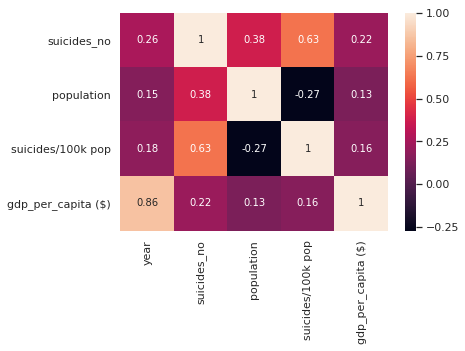

In [188]:
sns.heatmap(cor, annot=True)

---

#### what I'm going to do is  plot suicide based on age groups from youngest to oldest, and see which age group is  most likely to commit suicide regardless of generation and economic factors

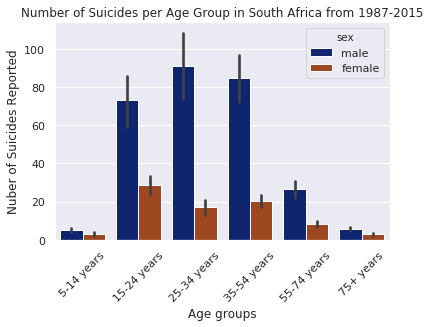

In [189]:
bar = sns.barplot(x='age',y='suicides_no', data=sa_df,
                  order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'],
                  hue='sex', palette= 'dark')

bar.set(xlabel='Age groups', ylabel='Nuber of Suicides Reported',
        title='Number of Suicides per Age Group in South Africa from 1987-2015')
plt.xticks(rotation=45)
sns.set()


#### These results are pretty shocking if I do say so myself. Not only because kids between the ages of 5 - 14 feel the need to take their own lives, but in every single age group, South African males are committing suicide far more than women are. which poses the question, why are men committing suicide so often? The economy has nothing to do it. Is it perhaps a mental health issue? External pressure? does ethnicity or cultural upbringing play a role? Religion maybe?

#### Unfortunately, this particular dataset is way too limited for me to be able to answer these questions effectively. but for now, all I can say with certainty is that men are far more likely to commit suicide than women are.

#### I think it's safe to assume that Generation Z makes up most of the data between the ages of 5 - 24, but as young as this generation is, it's already surpassed and almost doubled the suicide numbers of the GI generation as a whole. Bear in mind that most of the children of this generation are yet to enter the prime ages of suicide which seem to be somewhere between 25 - 55, and their predecessors the Millenials, aren't doing so well either. Millennials are leading the charts, and a significant portion of them are in their early 30's and mid to late 20's, so the numbers will surely rise with time. Whats happening in South Africa?#### what I'm going to do is  plot suicide based on age groups from youngest to oldest, and see which age group is  most likely to commit suicide regardless of generation and economic factors

[Text(0.5, 1.0, 'Generational Suicide')]

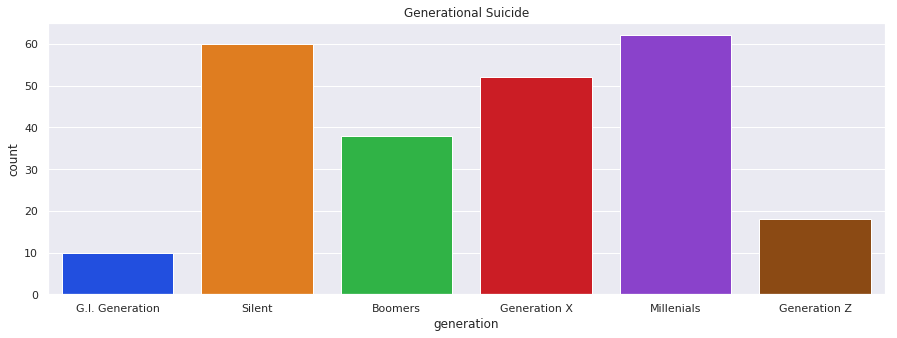

In [190]:
plt.figure(figsize=(15,5))
comb = sa_df['generation']
vis =sns.countplot(comb,label='generation',order=['G.I. Generation','Silent',
             'Boomers','Generation X','Millenials','Generation Z'], palette='bright')

vis.set(title='Generational Suicide')

#### Now what kind of Millenial would I be if I didn't selfishly dive a little deeper into my own generation for some extra insight.

In [191]:
sa_dfmil = sa_df.loc[sa_df['generation']=='Millenials']
sa_dfmil.reset_index(drop=True,inplace=True)

In [192]:
sa_dfmil.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
57,South Africa,2014,female,25-34 years,32,4747193,0.67,South Africa2014,"350,904,575,292",7174,Millenials
58,South Africa,2015,male,25-34 years,126,5001052,2.52,South Africa2015,"317,741,039,198",6403,Millenials
59,South Africa,2015,male,15-24 years,90,5190482,1.73,South Africa2015,"317,741,039,198",6403,Millenials
60,South Africa,2015,female,15-24 years,34,5105930,0.67,South Africa2015,"317,741,039,198",6403,Millenials
61,South Africa,2015,female,25-34 years,27,4822164,0.56,South Africa2015,"317,741,039,198",6403,Millenials


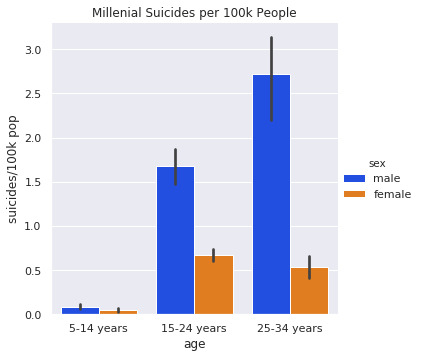

In [193]:
mill = sns.catplot(x='age', y='suicides/100k pop', data=sa_dfmil, 
                   kind='bar', hue='sex',palette="bright")

mill.set(title= 'Millenial Suicides per 100k People')

#### The men still show no sign of slowing the trend. 

---

#### You'd hope it's just a South African thin right...wrong, it looks like all over the world, at least in the 101 countries observed, men are committing suicide far more than women are, and shockingly, 75+-year-old men alone commit suicide more than all the female of all the generations put together! 

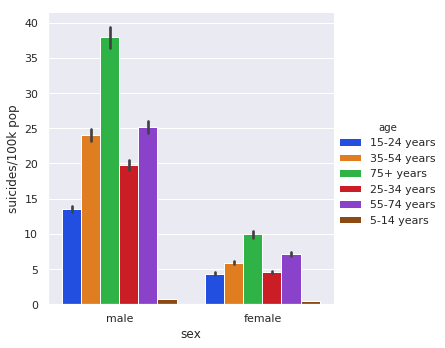

In [194]:
world = sns.catplot(x='sex', y='suicides/100k pop', data=df, kind='bar', hue='age',palette="bright")

### Thank you for taking the time to go through my findings, and please don't hesitate to give feedback.